<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a webpage

Download the webpage at the url


In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

Create a soup object


In [4]:
data = requests.get(url).text
soup = BeautifulSoup(data, "html.parser")

Scrape the `Language name` and `annual average salary`.


In [9]:
table = soup.find('table')
for row in table.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) >= 4:  # solo si hay suficientes columnas
        language = cols[1].getText(strip=True)
        salary = cols[3].getText(strip=True)
        print(f"{language} --- {salary}")

Language --- Average Annual Salary
Python --- $114,383
Java --- $101,013
R --- $92,037
Javascript --- $110,981
Swift --- $130,801
C++ --- $113,865
C# --- $88,726
PHP --- $84,727
SQL --- $84,793
Go --- $94,082


Save the scrapped data into a file named *popular-languages.csv*


In [11]:
import csv

with open("popular-language.csv", "w", newline='',encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Language", "Average Salary"])
                     
    for row in table.find_all("tr"):
        cols = row.find_all("td")
        if len(cols) >= 4:
            language = cols[1].get_text(strip=True)
            salary = cols[3].get_text(strip=True)
        
                     
                     
            if "Created By" not in language:
                writer.writerow([language, salary])
        

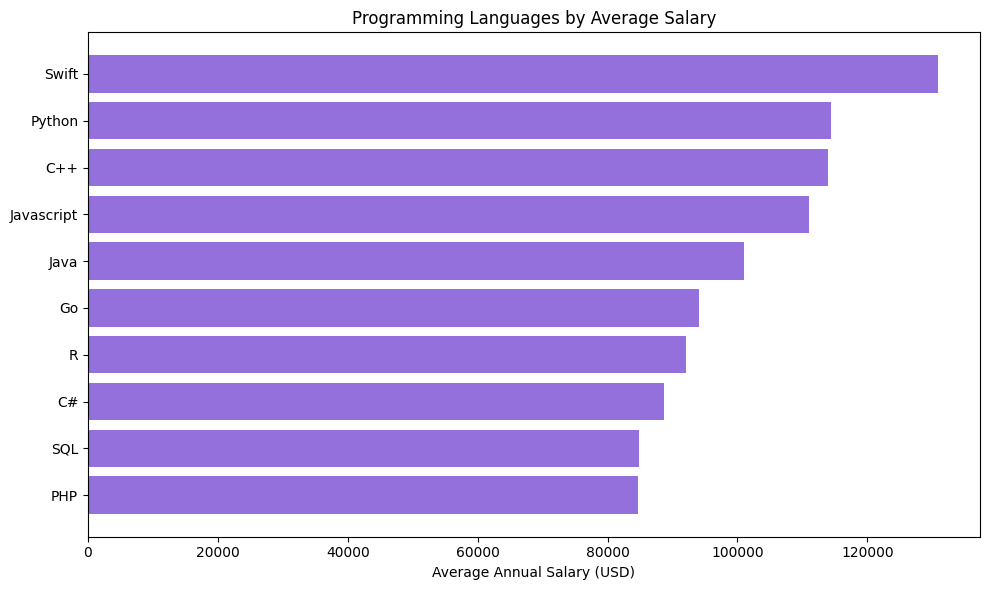

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('popular-language.csv')

# Filter rows
df = df[~df['Language'].str.contains('Language', na=False)]

# Limpiar salario y convertir a float
df['Average Salary'] = df['Average Salary'].replace('[\$,]', '', regex=True).astype(float)


# Sort and plot
df_sorted = df.sort_values(by='Average Salary', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(df_sorted['Language'], df_sorted['Average Salary'], color='mediumpurple')
plt.xlabel('Average Annual Salary (USD)')
plt.title('Programming Languages by Average Salary')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
